In [1]:
from plywood_gallery import ChapterManager
#ChapterManager.clean("Image Options")
ChapterManager.reset_counter()
ChapterManager.set_chapter_name("Image Options")

2022-01-11 13:23:32.300 Python[10480:245706] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/org.python.python.savedState


NapariSettings (defaults excluded)
----------------------------------
appearance:
  layer_tooltip_visibility: true
  theme: light
application:
  first_time: false
  window_position:
  - 800
  - 300
  window_size:
  - 1000
  - 100
  window_state: '!QBYTE_AAAA/wAAAAD9AAAAAgAAAAAAAAECAAACGPwCAAAAAvsAAAAcAGwAYQB5AGUAcgAgAGMAbwBuAHQAcgBvAGwAcwEAAAAAAAACGAAAAUkAAAFJ+wAAABQAbABhAHkAZQByACAAbABpAHMAdAAAAAAAAAACGAAAALcA////AAAAAwAAAAAAAAAA/AEAAAAB+wAAAA4AYwBvAG4AcwBvAGwAZQAAAAAA/////wAAADIA////AAABYgAAAhgAAAAEAAAABAAAAAgAAAAI/AAAAAA='
  window_statusbar: false

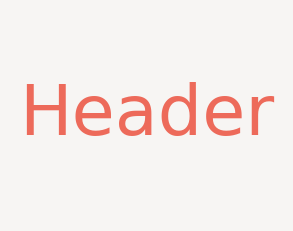

In [2]:
%%capture_png -p Header2.png --celltype Header --style "width:140px"
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800,300)
get_settings().application.window_size = (1000,100)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar =  False
get_settings().application.save_window_state =  False

try:
    viewer
except NameError:
    viewer = napari.Viewer()
    viewer.theme = "light"
    viewer.dims.ndisplay = 3

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash= False)
    plt.imshow(img)
    plt.axis("off")

# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs  = blobs[200:,200:, :-100]
blobs[:,:,:50]=1

import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,4), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

from napari.settings import get_settings
get_settings()

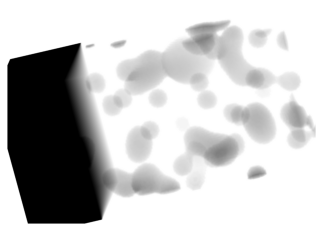

In [3]:
%%capture_png -p FirstView.png --celltype Normal --style "width:200px"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs, colormap='gray_r')
layer1.rendering = "average"
layer1.gamma = 0.9
viewer.camera.angles = (13, 10, 77)
layer1.opacity = 1
make_screenshot(viewer)
# average
# gray_r

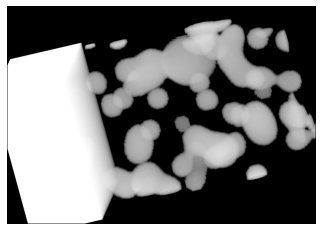

In [4]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:200px"
viewer.theme = "dark"
layer1.colormap = "gray"
layer1.gamma = 0.2
make_screenshot(viewer)

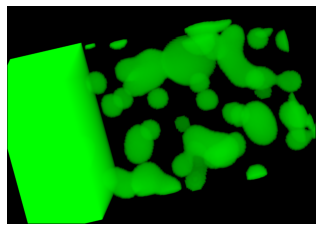

In [5]:
%%capture_png -p ColorGreen.png --celltype Normal --style "width:200px"
layer1.colormap = "green"
layer1.gamma = 0.2
make_screenshot(viewer)



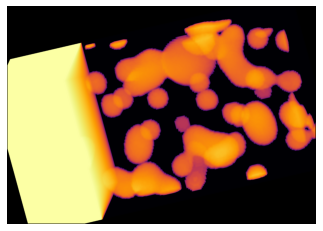

In [6]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:200px"
layer1.colormap = "inferno"
layer1.gamma = 0.2 
make_screenshot(viewer) 

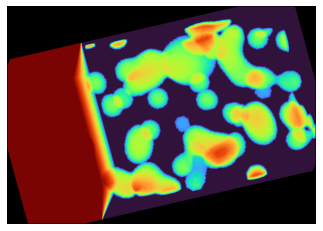

In [7]:
%%capture_png -p Colormapturbocontrast.png --celltype Normal --style "width:200px"
layer1.colormap = "turbo"
layer1.gamma = 0.5
layer1.contrast_limits = [0.0, 0.65]
make_screenshot(viewer) 

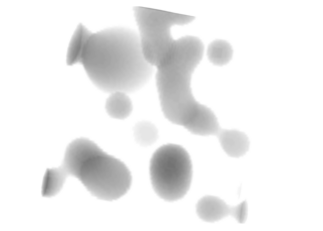

In [8]:
%%capture_png -p BackToBlackGamma1.png --celltype Normal --style "width:200px"
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs[50:,:,100:], colormap='gray_r')
layer1.rendering = "average"
layer1.gamma = 1
viewer.camera.angles = (-10, 12, 88)
layer1.opacity = 1
make_screenshot(viewer)

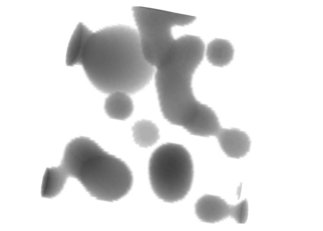

In [9]:
%%capture_png -p BackToBlackGamma0_5.png --celltype Normal --style "width:200px"
layer1.rendering = "average"
layer1.gamma = 0.5
make_screenshot(viewer)

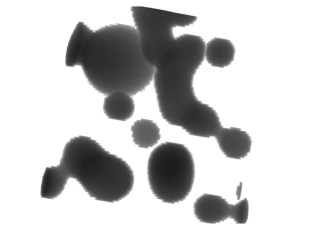

In [10]:
%%capture_png -p BackToBlackGamma0_2.png --celltype Normal --style "width:200px"
layer1.rendering = "average"
layer1.gamma = 0.2
make_screenshot(viewer)